# Fig1 The soil properties and observations of velocity change.

In [14]:
import os
import sys
sys.path.append("./src")
from soil_models import *
import h5py
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
matplotlib.rcParams.update({'font.size': 18})
plt.rcParams['font.family'] = 'Helvetica'

data_dir='./data/'
fig_dir = './figures/'

### Some parameters
samp_freq = 500  ## sampling rate of the ACFs
win_st = int(0.012*samp_freq)   ## coda window start
H = 5.4  # assuming soil thickness to be 3 m


<img src="figures/farm_pic.jpg" alt="Farm Picture" width="400"/>

# Data

## Resonance frequency (150-220 min)

In [2]:
f0 = [37.85, 37.87, 39.48, 39.45, 39.43,
      39.42, 38.00, 37.00, 36.43, 36.32,
      36.30, 26.77, 26.05, 26.05, 26.61,
      34.69, 33.67, 33.59, 33.79, 38.71,
      38.72, 38.73, 29.00, 28.63, 27.84,
      32.40, 32.07, 32.08, 30.76, 30.80,
      30.80, 30.80, 37.15, 37.15, 37.15,
      37.15, 23.21, 24.01, 24.00, 25.00,
      26.00, 27.00, 28.00, 28.93, 28.92,
      28.69, 28.69, 28.69, 35.47, 35.62]   ## corrected f0

## Physical properties of the soil

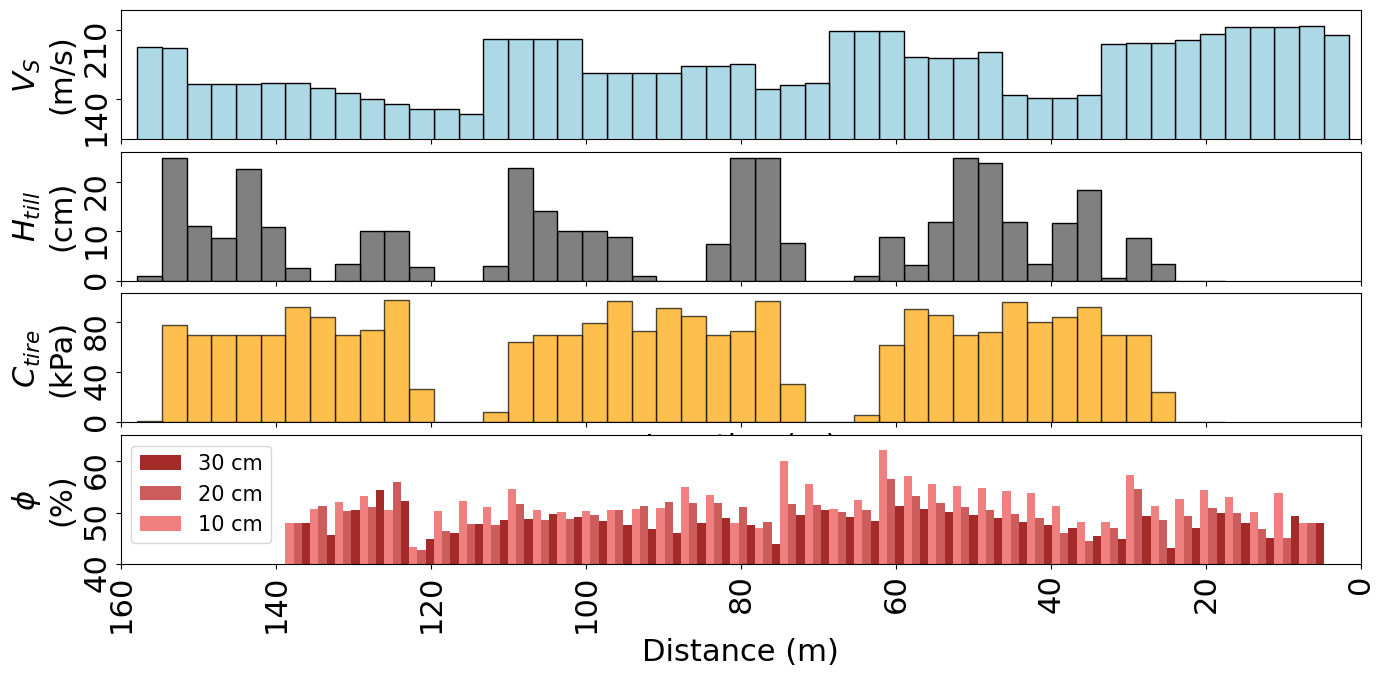

In [3]:
### Shear wave velocity
vs  = H * np.array(f0) 

### Disturbance parameters: tiillage depth and tire pressure
damage = pd.read_csv(os.path.join(data_dir, 'damage_index.csv'))
tillage_depth = damage['tillage_depth'].values
tire_pressure = damage['tire_pressure'].values

### porosity (bulk density)
soil_phy = pd.read_csv(os.path.join(data_dir, 'interpolated_soil_phy.csv'))
interp_porosity_10cm = soil_phy['interp_porosity_10cm'].values
interp_porosity_20cm = soil_phy['interp_porosity_20cm'].values
interp_porosity_30cm = soil_phy['interp_porosity_30cm'].values
# interp_bulk_density_10cm = soil_phy['interp_bulk_density_10cm'].values
# interp_bulk_density_20cm = soil_phy['interp_bulk_density_20cm'].values
# interp_bulk_density_30cm = soil_phy['interp_bulk_density_30cm'].values


## Plotting
fig, axs = plt.subplots(4, 1, figsize=(16, 7.2), sharex=True, gridspec_kw={'hspace': 0.1})
bar_width = 3.19

# Plot Vs
axs[0].bar(np.arange(1,50) * 3.19, vs[1:], color='lightblue', width=3.19, edgecolor='black')
axs[0].set_ylabel('$V_S$ \n(m/s)', fontsize=22)
axs[0].set_ylim(100, 230)
axs[0].set_yticks(np.arange(140, 230, 70))
axs[0].set_xlim(160, 0)  # Reverse x-axis
# Highlight the 18th and 33rd bar
# axs[0].bar(17 * bar_width, vs[17], color='lightblue', width=bar_width, edgecolor='#374E8C', linewidth=4)
# axs[0].bar(32 * bar_width, vs[32], color='lightblue', width=bar_width, edgecolor='#374E8C', linewidth=4)
# axs[0].bar(44 * bar_width, vs[32], color='lightblue', width=bar_width, edgecolor='#374E8C', linewidth=4)
# axs[0].axhline(180, color='black', linestyle='--', linewidth=2)

# Plot tillage depth
axs[1].bar(np.arange(6, 50) * 3.19, tillage_depth, color='gray', width=3.19, edgecolor='black')
axs[1].set_ylabel('$H_{till}$ \n(cm)', fontsize=22)
axs[1].set_yticks(np.arange(0, 25, 10))
axs[1].set_xlim(160, 0)  # Reverse x-axis

# Plot tire pressure
axs[2].bar(np.arange(6, 50) * 3.19, tire_pressure, color='orange', width=3.19, edgecolor='black', alpha=0.7)
axs[2].set_ylabel('$C_{tire}$ \n(kPa)', fontsize=22)
axs[2].set_xlabel('Location (m)')
axs[2].set_yticks(np.arange(0, 100, 40))
axs[2].set_xlim(160, 0)  # Reverse x-axis

# Plot porosit
x = np.arange(50) * bar_width
axs[3].set_ylim(40, 65)
axs[3].bar(x[2:44] - bar_width/3, interp_porosity_30cm[2:44], width=bar_width/3, label='30 cm', color='brown', align='center')
axs[3].bar(x[2:44], interp_porosity_20cm[2:44], width=bar_width/3, label='20 cm', color='indianred', align='center')
axs[3].bar(x[2:44] + bar_width/3, interp_porosity_10cm[2:44], width=bar_width/3, label='10 cm', color='lightcoral', align='center')

axs[3].set_xlabel("Distance (m)", fontsize=22)
axs[3].set_ylabel("$\phi$ \n(%)", fontsize=22)
axs[3].set_yticks(np.arange(40, 65, 10))
axs[3].legend(loc='upper left', fontsize=15)
axs[3].set_xlim(160, 0)  # Reverse x-axis

# Rotate X and Y labels
for i in range(4):
    axs[i].xaxis.set_tick_params(rotation=90)
    axs[i].yaxis.set_tick_params(rotation=90)

plt.savefig(os.path.join(fig_dir, 'soil_properties.pdf'), dpi=300, bbox_inches='tight')


## Velocity change observations

In [4]:
### dV/V
with h5py.File(os.path.join(data_dir, 'final_peaks_deRatio_3iterations.h5'), 'r') as f:
    deratio_dvv = f['deratio_dvv'][:]

### Autocorrelation functions
with h5py.File(os.path.join(data_dir, 'autocorr_15_60Hz_3chs500pts.hdf5'), 'r') as f:
    corr_all_time_stretched1_ch18 = f['corr_all_time_stretched1_ch18'][:]
    corr_all_time_stretched1_ch33 = f['corr_all_time_stretched1_ch33'][:]
    corr_all_time_stretched1_ch44 = f['corr_all_time_stretched1_ch44'][:]
    corr_all_time_stretched2_ch18 = f['corr_all_time_stretched2_ch18'][:]
    corr_all_time_stretched2_ch33 = f['corr_all_time_stretched2_ch33'][:]
    corr_all_time_stretched2_ch44 = f['corr_all_time_stretched2_ch44'][:] 
    corr_all_time_stretched3_ch18 = f['corr_all_time_stretched3_ch18'][:]
    corr_all_time_stretched3_ch33 = f['corr_all_time_stretched3_ch33'][:]
    corr_all_time_stretched3_ch44 = f['corr_all_time_stretched3_ch44'][:] 

# Plot stretched ACF with dV/V

In [5]:
from das_util import *

with h5py.File(os.path.join(data_dir, 'integrated_psd.hdf5'), 'r') as f:
    file_list = f['file_list'][:]
acqu_time = np.array([get_tstamp(i) for i in file_list.astype('U')])

## Index on the hour
hourly_index = [7,67,127,187,247,299,359,419,466,526,586,646,706,766,826,886,946,1003,1063,1123,
         1183,1243,1302,1362,1422,1482,1542,1599,1659,1719,1779,1839,1899,1959,2019,
         2078,2138,2198,2258,2318]
hourly_index = np.array(hourly_index)
xax=hourly_index[::6]
tax=acqu_time[hourly_index[::6]]
# xax=np.arange(7, 2408, 360)
# tax=acqu_time[7:2408:360]
hrax=[dt.strftime('%H') for dt in tax]

/var/folders/94/_f91r5t1277f16yl_03mnxkw0000gn/T/ipykernel_30804/2766244760.py:54: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(os.path.join(fig_dir, 'stretched_acf_3times_ch18'+'.pdf'), dpi=300)
/var/folders/94/_f91r5t1277f16yl_03mnxkw0000gn/T/ipykernel_30804/2766244760.py:54: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(os.path.join(fig_dir, 'stretched_acf_3times_ch18'+'.pdf'), dpi=300)
/Users/shiqibin/miniconda3/envs/quakeflow/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


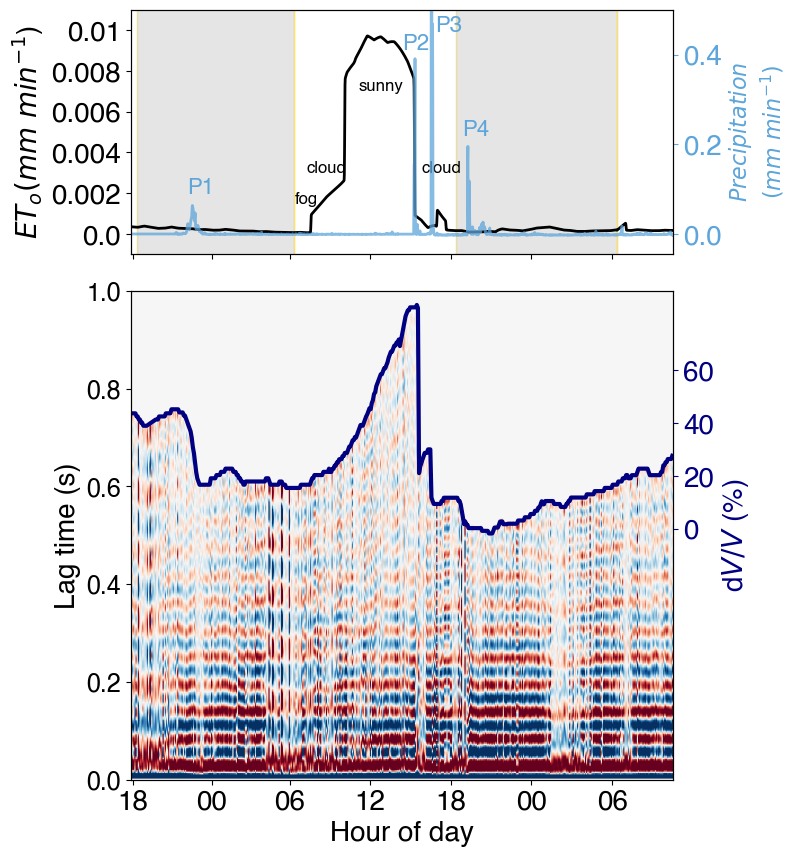

In [62]:
eto_psd = pd.read_csv(os.path.join(data_dir, 'eto_psd.csv'))

######################### FIGURE
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 10), tight_layout=True, gridspec_kw={'height_ratios': [1, 2], 'hspace': 0.1}, sharex=True)

# Weather data plot
ax1.fill_between([27,   726], [-0.2,-0.2], [3.7,3.7], color='gray', alpha=0.2)
ax1.fill_between([1443,2158], [-0.2,-0.2], [3.7,3.7], color='gray', alpha=0.2)
ax1.axvline(x=27,   color='#FFE066', linestyle='-', lw=1, alpha=0.5)
ax1.axvline(x=726,  color='#FFE066', linestyle='-', lw=1, alpha=1)
ax1.axvline(x=1443, color='#FFE066', linestyle='-', lw=1, alpha=0.5)
ax1.axvline(x=2158, color='#FFE066', linestyle='-', lw=1, alpha=1)
# ax1.text(227,   0.009, '$night$',  color='k', fontstyle='italic', alpha=0.5, fontsize=14)
# ax1.text(726,  0.009, '$sunrise$', color='k', fontstyle='italic', alpha=0.5, fontsize=14)
# ax1.text(1443, 0.009, '$sunset$',  color='k', fontstyle='italic', alpha=0.5, fontsize=14)
# ax1.text(2158, 0.009, '$sunrise$', color='k', fontstyle='italic', alpha=0.5, fontsize=14)
ax1.text(726, 0.0015, 'fog',     color='k', fontsize=12)
ax1.text(780,  0.003, 'cloud',   color='k', fontsize=12)
ax1.text(1010,  0.007, 'sunny',  color='k', fontsize=12)
ax1.text(1290, 0.003, 'cloud',   color='k', fontsize=12)

ax1.plot(np.arange(2408), eto_psd['eto_every_minute_smooth'], color='k', lw=2, label='reference ET')
ax1.set_ylabel("$ET_o (mm~min^{-1}$)", fontsize=20)
ax1.set_ylim(-0.001, 0.011)
ax1.set_yticks(np.arange(0, 0.012, 0.002))
ax1.set_yticklabels(np.arange(0, 0.012, 0.002), fontsize=20)
twinx = ax1.twinx()
twinx.plot(np.arange(2408), eto_psd['res_psd'], color='#5DA5DA', lw=2, label='rainfall rate', alpha=0.75)
twinx.tick_params(axis='y', colors='#5DA5DA')
twinx.set_ylabel("$Precipitation$\n$(mm~min^{-1})$", fontsize=16, color='#5DA5DA')
twinx.set_ylim(-0.045, 0.5)
twinx.set_yticks(np.arange(0, 0.5, 0.2))
twinx.set_yticklabels(np.arange(0, 0.5, 0.2), fontsize=20)
twinx.text(250,  0.09, 'P1',  color='#5DA5DA', fontsize=16)
twinx.text(1205, 0.41, 'P2',  color='#5DA5DA', fontsize=16)
twinx.text(1350, 0.45, 'P3',  color='#5DA5DA', fontsize=16)
twinx.text(1470, 0.22, 'P4',  color='#5DA5DA', fontsize=16)


### ACF plot
ax2.imshow(corr_all_time_stretched3_ch18.T, aspect='auto', vmin=-0.2, vmax=0.2, cmap='RdBu', origin='lower', extent=[0, 482*5, 0, 500/samp_freq], interpolation=None)
ax2.set_xlabel("Hour of day", fontsize = 20)
ax2.set_ylabel("Lag time (s)", fontsize = 20)
ax2.set_xticks(xax)
ax2.set_xticklabels(hrax, fontsize=20)
twinx = ax2.twinx()
twinx.plot(np.arange(482)*5, deratio_dvv[18], color='navy', lw=3)
twinx.set_ylim(-0.95, 0.9)
twinx.set_yticks(np.arange(0.0, 0.7, 0.2))
twinx.set_yticklabels(np.arange(0, 70, 20), fontsize=20)
twinx.tick_params(axis='y', colors='navy')
twinx.set_ylabel('d$V / V$ (%)', color='navy', fontsize=20)

plt.savefig(os.path.join(fig_dir, 'stretched_acf_3times_ch18'+'.pdf'), dpi=300)

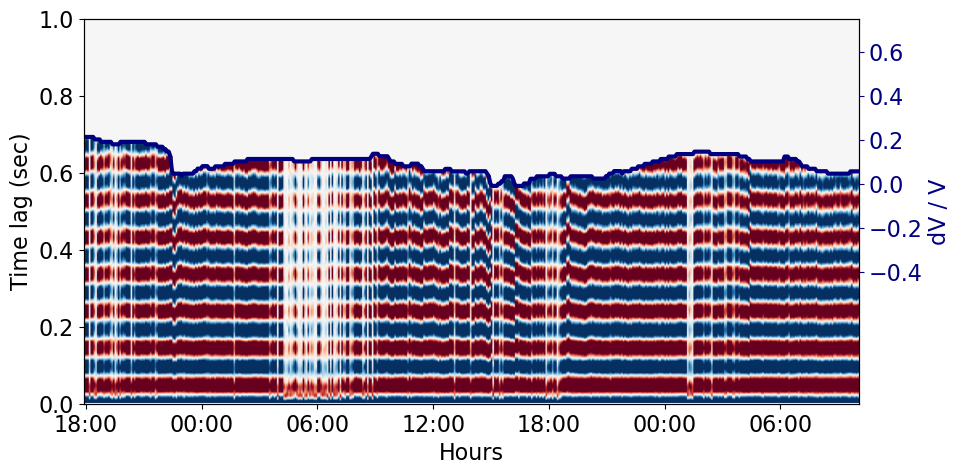

In [22]:
plt.figure(figsize=(10, 5))

plt.imshow(corr_all_time_stretched3_ch33.T, aspect='auto', vmin=-0.3, vmax=0.3, cmap='RdBu', origin='lower', extent=[0, 482*5, 0, 500/samp_freq], interpolation=None)
plt.xlabel("Hours", fontsize = 16)
plt.ylabel("Time lag (sec)", fontsize = 16)
# plt.title('stretched ACF three times of Ch.33')
plt.xticks(xax, hrax)
twinx = plt.gca().twinx()
twinx.plot(np.arange(482)*5, deratio_dvv[33], color='navy', lw=3)
twinx.set_ylim(-1, 0.75)
twinx.set_yticks(np.arange(-0.4, 0.7, 0.2))
twinx.tick_params(axis='y', colors='navy')
twinx.set_ylabel('dV / V', color='navy')
plt.savefig(os.path.join(fig_dir, 'stretched_acf_3times_ch33'+'.pdf'), dpi=300)

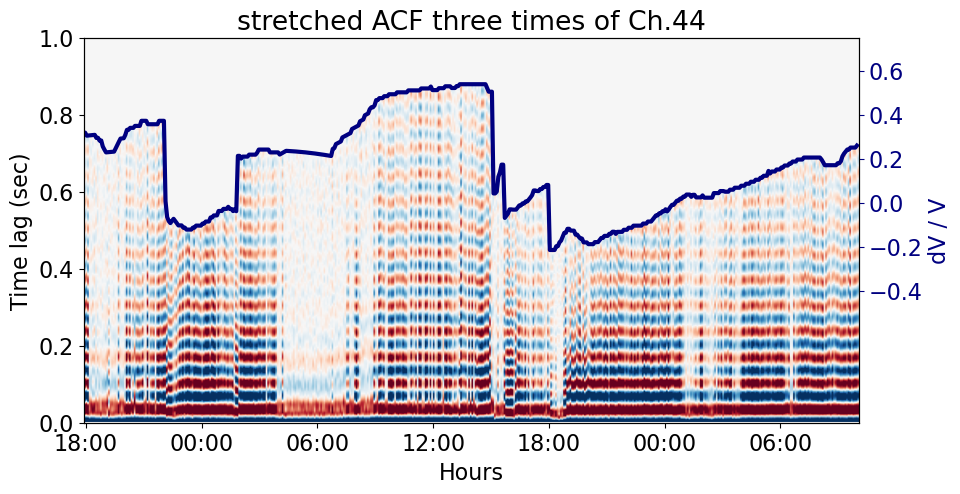

In [23]:
plt.figure(figsize=(10, 5))

plt.imshow(corr_all_time_stretched3_ch44.T, aspect='auto', vmin=-0.3, vmax=0.3, cmap='RdBu', origin='lower', extent=[0, 482*5, 0, 500/samp_freq], interpolation=None)
plt.xlabel("Hours", fontsize = 16)
plt.ylabel("Time lag (sec)", fontsize = 16)
plt.title('stretched ACF three times of Ch.44')
plt.xticks(xax, hrax)
twinx = plt.gca().twinx()
twinx.plot(np.arange(482)*5, deratio_dvv[44], color='navy', lw=3)
twinx.set_ylim(-1, 0.75)
twinx.set_yticks(np.arange(-0.4, 0.7, 0.2))
twinx.tick_params(axis='y', colors='navy')
twinx.set_ylabel('dV / V', color='navy')
plt.savefig(os.path.join(fig_dir, 'stretched_acf_3times_ch44'+'.pdf'), dpi=300)